
# Task 1: Varying Box size and Location
To better understand images, we will create an Image of a boxes on a white background with different size and locations.  We will automate a process to detector and countor those boxes. 

To begin this task one must set the size of the image you want and then create an image of size (XREX,YREZ) called im using np.zeroes function with values fo the array set to 255 (black) or 0 (white). 

Next, set the size of the box with W-width and H-height. 

This **box** is the **object**.
We will detect the box (find in an image) using contouring and then draw a square around the **object**

Next we will set the position within the image to place your box. This is possible by setting an x0 and y0 value that corresponds to point of origin within the XREZ/YREZ dimensions. Next you will simply add the size dimentions to the x0 and y0 to create x1 and y1 positions which complete full box image. 

Lastly, you will set the pixel color for the box so that all the pixels are one color. 
 
Ref: See Week 1 Bouncing Box Workbook.


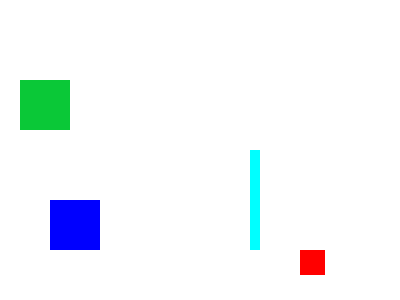

In [ ]:
# importing the libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#Set image dimensions and color channels
XREZ=400
YREZ=300
COLOR_CHANNELS=3

# create array for image    
im=np.zeros((YREZ,XREZ,COLOR_CHANNELS),dtype='uint8') #

#position 1 size 1
W=50;   H=50;
xA0=20;   xA1=xA0+W;
yA0=80;   yA1=yA0+H;

#position 2 size 1
W=50;   H=50;
xB0=50;   xB1=xB0+W;
yB0=200;   yB1=yB0+H;

#position 3 shape 2
W=10;   H=100;
xC0=250;   xC1=xC0+W;
yC0=150;   yC1=yC0+H;

#position 4 size 2
W=25;   H=25;
xD0=300;   xD1=xD0+W;
yD0=250;   yD1=yD0+H;

WHITE_CH=[0,1,2]

im[:,:,:]=255; # make all pixels white (most microscopy images are light background and dark image)  #
#im[:,:,:]=0 #black backgound
#add color to the squares
im[yA0:yA1,xA0:xA1,WHITE_CH]=[55,200,10]
im[yB0:yB1,xB0:xB1,WHITE_CH]=[255,0,0]
im[yC0:yC1,xC0:xC1,WHITE_CH]=[255,255,0]
im[yD0:yD1,xD0:xD1,WHITE_CH]=[0,0,255]

# displaying the image
cv2_imshow(im)


Student explorations:
Adjust the size, shape and location of your boxes?  Can you place them at each corner, all in the center, what happens when they overlap?
Return to these objects the original values for the next task:
-position 1 size 1
W=50;   H=50;
xA0=20;   xA1=xA0+W;
yA0=80;   yA1=yA0+H;

=position 2 size 1
W=50;   H=50;
xB0=50;   xB1=xB0+W;
yB0=200;   yB1=yB0+H;

-position 3 shape 2
W=10;   H=100;
xC0=250;   xC1=xC0+W;
yC0=150;   yC1=yC0+H;

-position 4 size 2
W=25;   H=25;
xD0=300;   xD1=xD0+W;
yD0=250;   yD1=yD0+H;

---
# Task 2: Run DetectCountor and explore output.  Learn how each box is different in the file.

Outline:
*   Why Boxes?
*   What are contours?
*   What is being detected?
*   How to display your findings.

So you might be wondering, why boxes? Two reasons: 1) in programming world (just like in science), you use a baseline example to test out your understanding or to test out your ideas. Here, we're using a solid color, which is uniform. 

Reason 2: This is kind of how computer vision (the "cv" in OpenCV) "sees" objects, as boxes or shapes. Want a similar real world example? Look at any detailed object around you (e.g. a cell phone or a water bottle), now squint so that you barely see the details of the object. Notice how almost all the details are gone and you get a blurry shape of an object. That's almost how computer vision works, at least conceptually!

Now that you created a sample image that's more varied, let's use OpenCV to detect those varied boxes.

First, let's make a copy of the image. Why? In case we make changes to the image. We always want to preserve the original, unmarked one.


In [ ]:
# Make a copy of the time image from the previous section
four_boxes_img = im.copy()

# show the image to make sure it was copied successfully
cv2_imshow(four_boxes_img)   #

So, why use the copy() function instead of just using the "=" sign without the copy()? The way Python works is for certain data, like images, every variable you use with the "=" (equals) sign only points to that image. The result, any change you make on the new one will change the original image. That's a bad thing for image procesing. That's like doing graffitti on the Mona Lisa painting without making a copy first! For more details (along with the why), Google keywords: "assignment vs copy python". Assignment is the "=" sign.

Next, we will convert the above image to grayscale. OpenCV likes something called "binary images" when trying to detect objects, which means 2 channels and the objects are either white or black. Any "thing" that is "white" will be seen as an object in OpenCV (remember the blurry squinting you did in real life?). 

In [ ]:
# convert to grayscale 
# since original image has 3 channels, we are going to convert to grayscale (2 channels)
grayIM = cv2.cvtColor(four_boxes_img, cv2.COLOR_BGR2GRAY) #{insert code here}

# show the image to make sure it looks okay
cv2_imshow(grayIM)    #

We have the grayscale image now, but OpenCV wants a binary image (a white or black image). In numbers, that means 255 (white) or 0 (black).

Side Note:  What is white and black is often confusing, since all  A memory trick one of the authors use is: white is the absorbances of all colors, it "maxes" out, so 255. Black is the absence of color, or no colors, so zero.

Next, let's convert that grayscale image to binary.

In [ ]:
# Convert GrayScale Image to Binary

# Threshold Constant, you will have to play around with this to make sure all 4 boxes show up.
# Recall that color values are between 0 and 255.
# So the threshold is saying any value below 20 will be considered black (turned to 0),
# while any value above 20 will be considered white (turned to 255)

thresh=200 # used to determine if a pixel is assigned 0 or 255
max_val = 255

ret,binaryIM = cv2.threshold(grayIM, thresh, max_val, cv2.THRESH_BINARY) # threshold output shown as white
#We want a white image on a black ground.  read up on threshold function openCV and change function call to do this task.
#{insert code here}
ret,binaryIM = cv2.threshold(grayIM, thresh, max_val, cv2.THRESH_BINARY_INV) # threshold output shown as white
cv2_imshow(binaryIM) #




In [ ]:
# detect objects in binary image
contourList, hierarchy = cv2.findContours(binaryIM, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # all countour points, uses more memory

# Print the length of the list of contours (we are expecting four, did it work?)
print(f"contourList len: {len(contourList)}")
# Student exploration - adjust the threshold to reduce the number of images --- does the countor length change as expected?


Next, we will use OpenCV's findContours() function. Wait, what's a contour? A contour is a "curve joining all the continous points" of the object. More details here: https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html. For a square, that would be four points. If we were using a triangle, it would be 3 points. For a human shape...that would be a lot points. That's why we're starting simple first.

Let's find those contours. First, I'll show you the code, then explain what all those inputs mean.

Overall, you give the findContours() function the image you're trying to detect objects in, along with two other parameters that control what kind of objects. Then two outputs are created: the list of contours (this is what we want) and a hierarchy.

Now for the details:

grayIM here is the input image, must be a binary image (black or white image). 
We will covert the grayIM into a binary image binaryIM.

What is cv2.RETR_EXTERNAL? This second input is all about the "[RetrievalModes](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga819779b9857cc2f8601e6526a3a5bc71)" and how you want to retrieve the contours. Here, RETR_EXTERNAL means retrieve external contours only; useful for detecting bigger objects. Other retrieval methods involve getting individual objects inside a bigger object (e.g. organelles inside of a cell). Click the link in this paragraph for slightly more details and other values you could use.

Side note: The OpenCV documentation link provided can be a bit dense and technical (and is written in another programming language). Definitely read it with a friend and consult with people on it.

Now that you have the meaning of this input, what exactly is cv2.RETR_EXTERNAL? It's an integer, a number. OpenCV has these constants labeled this way to make it easier for us to know what is actually going into the input of functions; called "readability", very important when looking back on your old code or when working on a team, so that everyone is on the same page.

Finally, the last of the inputs, we have cv2.CHAIN_APPROX_SIMPLE, what is this? This tells OpenCV we only want the end points (sometimes called vertex or vertices) of the object. This makes it a little easier for us, the humans, to understand the output. Additionally, it reduces the data size of the list of contours. [More details and constants here, aka ContourApproximationModes.](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga4303f45752694956374734a03c54d5ff)

That was a lot to wrap your head around for just one line of code! Take a short break to let things soak in, or continue on!

The last of outputs, what is the hierarchy? We will not be using it for these exercises, but it's basically the way to find objects inside of the objects. That's advanced, we won't be doing that for this course, but if you're curious, [here's a link](https://docs.opencv.org/4.x/d9/d8b/tutorial_py_contours_hierarchy.html).

So we have four contours, but what's actually in there?

In [ ]:
# We're going to use a for loop to go through each contour found.
# Then we're going to print all the points of that contour to see what's in there.

# Let's count the number of objects with this objectCount variable
objectCount=0

# Setup the for loop
for objContour in contourList:
  # Print the object count along with the contour
  print(f"objContour {objectCount}:\n{objContour}\n")
  
  # Increase the count by 1
  objectCount+=1

Now lets explore the order that the Contour list generates its list.
Here are the objects -- fill in the ContourList order
{}CounterList(3)=  W=50; H=50; xA0=20; xA1=xA0+W; yA0=80; yA1=yA0+H;

{}CounterList(1)= W=50; H=50; xB0=50; xB1=xB0+W; yB0=200; yB1=yB0+H;

{}CounterList(2) = W=10; H=100; xC0=250; xC1=xC0+W; yC0=150; yC1=yC0+H;

{}CounterList(0)= W=25; H=25; xD0=300; xD1=xD0+W; yD0=250; yD1=yD0+H;


As expected, these are the coordinates of the endpoints (or vertices) of each of the rectangles (or squares, if you prefer). You can see each contour is actually quite different. They have different points, and if you calculated it, different heights and widths.

We want to verify the results to see if OpenCV actually detected the right objects. So we could compare/contrast the expected results (the created box values) vs the actual results (the contours) by hand.

But there's a faster way, let's just use the contours and draw on the image instead.

In [ ]:
# Border Constants (placed here for easier control)
# border_color = 125 # For grayscale, value between 0 and 255. 125 is gray.
border_color = (0, 255,255) # For BGR, value between 0 and 255. Yellow
thick = 3   # thickness of rectangle lines around detected objects

four_boxes_img_copy = four_boxes_img.copy()

# Same for loop as before, but with added drawing abilities.
# Removed the counter since we won't be using it here.

for objContour in contourList:

  # Create a bounding rectangle using the objContour points, store in a list called PO (Points of Object)
  PO = cv2.boundingRect(objContour)

  # Extract the values from PO
  # PO list order: x-origin, y-origin, rectangle width, and rectangle height
  # Origin is the top-left of the rectangle
  x0=PO[0]; y0=PO[1]; w=PO[2]; h=PO[3]

  # Optional: print out the results to see how different they are (uncomment the below line)
  # print(f"x0: {x0}, y0: {y0}, w: {w}, h: {h}")

  # Draw the rectangle on grayIM starting at the top-left at (x0,y0) and
  # ending at the bottom right (x0+w,y0+h).
  # Use the gray border_color with a thickness of 3 pixels.
  cv2.rectangle(four_boxes_img_copy, (x0,y0), (x0+w,y0+h), border_color, thick)

# Show the image, do you see 4 bounding rectangles?
cv2_imshow(four_boxes_img_copy)

#can you place contours on the binary image?
#{insert code here}
binaryIM_copy = binaryIM.copy()
border_color = 125 # For BGR, value between 0 and 255. Yellow
for objContour in contourList:

  # Create a bounding rectangle using the objContour points, store in a list called PO (Points of Object)
  PO = cv2.boundingRect(objContour)

  # Extract the values from PO
  # PO list order: x-origin, y-origin, rectangle width, and rectangle height
  # Origin is the top-left of the rectangle
  x0=PO[0]; y0=PO[1]; w=PO[2]; h=PO[3]

  # Optional: print out the results to see how different they are (uncomment the below line)
  # print(f"x0: {x0}, y0: {y0}, w: {w}, h: {h}")

  # Draw the rectangle on grayIM starting at the top-left at (x0,y0) and
  # ending at the bottom right (x0+w,y0+h).
  # Use the gray border_color with a thickness of 3 pixels.
  cv2.rectangle(binaryIM_copy, (x0,y0), (x0+w,y0+h), border_color, thick)

# Show the image, do you see 4 bounding rectangles?
cv2_imshow(binaryIM_copy)

Look at that, our algorithm actually detected the 4 boxes! 

We used programming to create sample images, used more programming to detect those objects, and also used programming to display the actual results to verify if our algorithm was working. You did a lot of work and you can see the potential to automate object detection now.

# Student exploration
**1. Do the same with a black image background (hint: you need to change threshold values**
**2. Do this same excercise but make objects overlap? What happened? See the problem with here?  We will discuss later**

This is the first step on how computer vision recognizes faces and objects using ML/AI.

Congratulations!